In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import re, string, os, warnings
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\91934\OneDrive\Desktop\Movie-Recommendation-System-Using-Sentiment-Analysis-main\data_set\IMDB Dataset.csv\IMDB Dataset.csv")

In [3]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [5]:
data.shape

(50000, 2)

In [6]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [8]:
data.isnull().any()

review       False
sentiment    False
dtype: bool

In [9]:
data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [10]:
train_reviews = data.review[:40000]
train_sentiments = data.sentiment[:40000]

test_reviews = data.review[40000:]
test_sentiments = data.sentiment[40000:]

print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(40000,) (40000,)
(10000,) (10000,)


In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91934\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')

In [13]:
len(stopword_list)

198

In [14]:
stopword_list

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [15]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

data['review'] = data['review'].apply(denoise_text)

In [16]:
def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern,'',text)
    return text

data['review'] = data['review'].apply(remove_special_characters)

In [17]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

data['review'] = data['review'].apply(simple_stemmer)

In [18]:
stop = set(stopwords.words('english'))

def remove_stopwords(text, is_lower_case = False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

data['review'] = data['review'].apply(remove_stopwords)

In [19]:
norm_train_reviews = data.review[:40000]
norm_train_reviews[0]

'one review ha mention watch 1 oz episod youll hook right thi exactli happen meth first thing struck oz wa brutal unflinch scene violenc set right word go trust thi show faint heart timid thi show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti wa surreal couldnt say wa readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison exp

In [20]:
norm_test_reviews = data.review[40000:]
norm_test_reviews[45005]

'read review watch thi piec cinemat garbag took least 2 page find somebodi els didnt think thi appallingli unfunni montag wasnt acm humour 70 inde ani era thi isnt least funni set sketch comedi ive ever seen itll till come along half skit alreadi done infinit better act monti python woodi allen wa say nice piec anim last 90 second highlight thi film would still get close sum mindless drivelridden thi wast 75 minut semin comedi onli world semin realli doe mean semen scatolog humour onli world scat actual fece precursor joke onli mean thi handbook comedi tit bum odd beaver niceif pubesc boy least one hand free havent found playboy exist give break becaus wa earli 70 way sketch comedi go back least ten year prior onli way could even forgiv thi film even made wa gunpoint retro hardli sketch clown subtli pervert children may cut edg circl could actual funni come realli quit sad kept go throughout entir 75 minut sheer belief may save genuin funni skit end gave film 1 becaus wa lower scoreand

In [21]:
cv = CountVectorizer(min_df = 0.05, max_df = 1.0, binary = False, ngram_range = (1,3))

cv_train_reviews = cv.fit_transform(norm_train_reviews)
cv_test_reviews = cv.transform(norm_test_reviews)

print('BOW_cv_train:', cv_train_reviews.shape)
print('BOW_cv_test:', cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (40000, 378)
BOW_cv_test: (10000, 378)


In [22]:
tv = TfidfVectorizer(min_df = 0.05, max_df = 1.0, use_idf = True, ngram_range = (1,3))

tv_train_reviews = tv.fit_transform(norm_train_reviews)
tv_test_reviews = tv.transform(norm_test_reviews)

print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 378)
Tfidf_test: (10000, 378)


In [23]:
lb = LabelBinarizer()

sentiment_data = lb.fit_transform(data['sentiment'])
print(sentiment_data.shape)

(50000, 1)


In [24]:
data['sentiment'].head()

0    positive
1    positive
2    positive
3    negative
4    positive
Name: sentiment, dtype: object

In [44]:
sentiment_data

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [45]:
train_sentiments = sentiment_data[:40000]
test_sentiments = sentiment_data[40000:]

print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [46]:
lr = LogisticRegression(penalty = 'l2', max_iter = 500, C = 1, random_state = 42)

lr_cv = lr.fit(cv_train_reviews, train_sentiments)
print(lr_cv)

lr_tfidf = lr.fit(tv_train_reviews, train_sentiments)
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


In [47]:
lr_cv_predict = lr.predict(cv_test_reviews)
print(lr_cv_predict)

lr_tfidf_predict = lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 0 0 ... 1 0 0]
[0 0 0 ... 1 0 0]


In [48]:
lr_cv_score = accuracy_score(test_sentiments, lr_cv_predict)
print("lr_cv_score :", lr_cv_score)

lr_tfidf_score = accuracy_score(test_sentiments, lr_tfidf_predict)
print("lr_tfidf_score :", lr_tfidf_score)

lr_cv_score : 0.8272
lr_tfidf_score : 0.8356


In [49]:
lr_cv_report = classification_report(test_sentiments, lr_cv_predict, target_names = ['Positive','Negative'])
print(lr_cv_report)

lr_tfidf_report = classification_report(test_sentiments, lr_tfidf_predict, target_names = ['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.83      0.83      0.83      4993
    Negative       0.83      0.83      0.83      5007

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

              precision    recall  f1-score   support

    Positive       0.84      0.83      0.83      4993
    Negative       0.83      0.85      0.84      5007

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [50]:
cm_cv = confusion_matrix(test_sentiments, lr_cv_predict, labels = [1,0])
print(cm_cv)

cm_tfidf = confusion_matrix(test_sentiments, lr_tfidf_predict, labels = [1,0])
print(cm_tfidf)

[[4137  870]
 [ 858 4135]]
[[4235  772]
 [ 872 4121]]


In [51]:
svm = SGDClassifier(loss = 'hinge', max_iter = 500, random_state = 42)

svm_cv = svm.fit(cv_train_reviews, train_sentiments)
print(svm_cv)

svm_tfidf = svm.fit(tv_train_reviews, train_sentiments)
print(svm_tfidf)

SGDClassifier(max_iter=500, random_state=42)
SGDClassifier(max_iter=500, random_state=42)


In [52]:
svm_cv_predict = svm.predict(cv_test_reviews)
print(svm_cv_predict)

svm_tfidf_predict = svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[0 0 0 ... 1 0 0]
[0 0 0 ... 1 0 0]


In [53]:
svm_cv_score = accuracy_score(test_sentiments, svm_cv_predict)
print("svm_cv_score :", svm_cv_score)

svm_tfidf_score = accuracy_score(test_sentiments, svm_tfidf_predict)
print("svm_tfidf_score :", svm_tfidf_score)

svm_cv_score : 0.8226
svm_tfidf_score : 0.8357


In [54]:
svm_cv_report = classification_report(test_sentiments, svm_cv_predict, target_names = ['Positive','Negative'])
print(svm_cv_report)

svm_tfidf_report = classification_report(test_sentiments, svm_tfidf_predict, target_names = ['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.80      0.85      0.83      4993
    Negative       0.84      0.79      0.82      5007

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000

              precision    recall  f1-score   support

    Positive       0.83      0.84      0.84      4993
    Negative       0.84      0.83      0.84      5007

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [55]:
cm_cv = confusion_matrix(test_sentiments, svm_cv_predict, labels = [1,0])
print(cm_cv)

cm_tfidf = confusion_matrix(test_sentiments, svm_tfidf_predict, labels = [1,0])
print(cm_tfidf)

[[3974 1033]
 [ 741 4252]]
[[4175  832]
 [ 811 4182]]


In [56]:
mnb = MultinomialNB()

mnb_cv = mnb.fit(cv_train_reviews, train_sentiments)
print(mnb_cv)

mnb_tfidf = mnb.fit(tv_train_reviews, train_sentiments)
print(mnb_tfidf)

MultinomialNB()
MultinomialNB()


In [57]:
mnb_cv_predict = mnb.predict(cv_test_reviews)
print(mnb_cv_predict)

mnb_tfidf_predict = mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[0 0 0 ... 1 0 0]
[0 0 0 ... 1 0 0]


In [58]:
mnb_cv_score = accuracy_score(test_sentiments, mnb_cv_predict)
print("mnb_cv_score :", mnb_cv_score)

mnb_tfidf_score = accuracy_score(test_sentiments, mnb_tfidf_predict)
print("mnb_tfidf_score :", mnb_tfidf_score)

mnb_cv_score : 0.8091
mnb_tfidf_score : 0.8182


In [59]:
mnb_cv_report = classification_report(test_sentiments, mnb_cv_predict, target_names = ['Positive','Negative'])
print(mnb_cv_report)

mnb_tfidf_report = classification_report(test_sentiments, mnb_tfidf_predict, target_names = ['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.81      0.80      0.81      4993
    Negative       0.81      0.81      0.81      5007

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000

              precision    recall  f1-score   support

    Positive       0.83      0.81      0.82      4993
    Negative       0.81      0.83      0.82      5007

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



In [60]:
cm_cv = confusion_matrix(test_sentiments, mnb_cv_predict, labels = [1,0])
print(cm_cv)

cm_tfidf = confusion_matrix(test_sentiments, mnb_tfidf_predict, labels = [1,0])
print(cm_tfidf)

[[4078  929]
 [ 980 4013]]
[[4162  845]
 [ 973 4020]]


<function matplotlib.pyplot.show(close=None, block=None)>

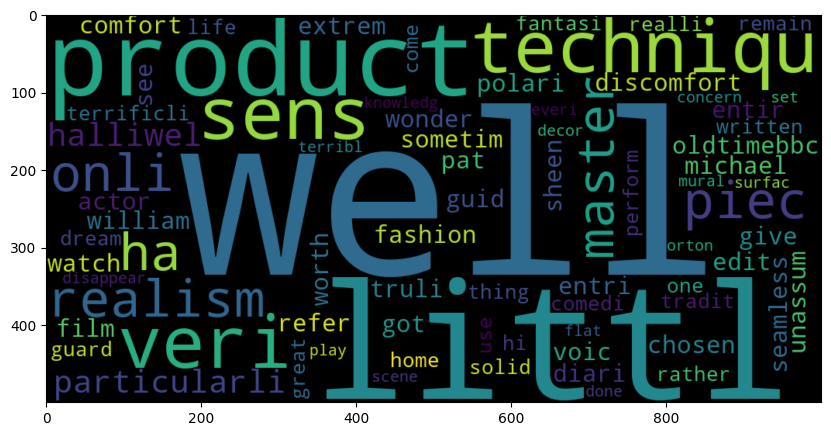

In [61]:
plt.figure(figsize = (10,10))
positive_text = norm_train_reviews[1]
WC = WordCloud(width = 1000, height = 500, max_words = 500, min_font_size = 5)
positive_words = WC.generate(positive_text)
plt.imshow(positive_words, interpolation = 'bilinear')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

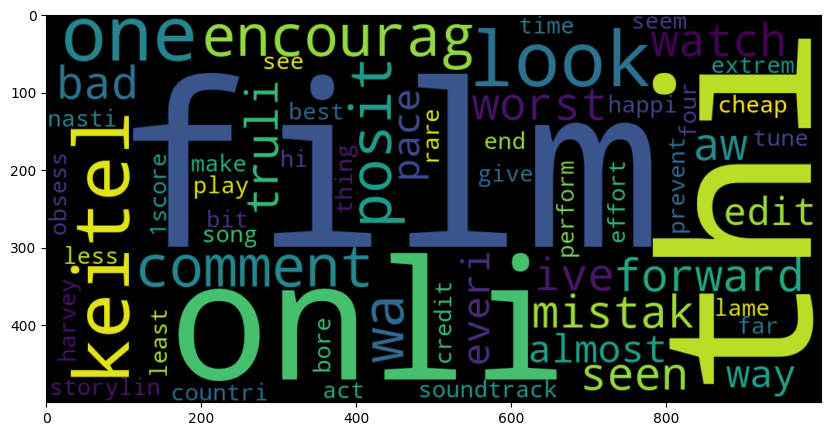

In [43]:
plt.figure(figsize = (10,10))
negative_text = norm_train_reviews[8]
WC = WordCloud(width = 1000, height = 500, max_words = 500, min_font_size = 5)
negative_words = WC.generate(negative_text)
plt.imshow(negative_words, interpolation = 'bilinear')
plt.show